# Introduction to Data Science

Authors: Jo Ciucă (ANU) 

In the first part of the Tutorial, we introduce the Python-based Data Science library Pandas and demonstrate some of its functionality by examining Pandas' main data structure, the DataFrame. In the first part (~45 mins/1 hr), we focus on the essentials of "data hacking" of loading, cleaning, exploring and visualising the data. For the second part, we employ what we learnt previously on a test case of exploratory data analysis. 

By the end of this notebook, we should be comfortable with the following:

1. **Primer of Pandas**: Data structures, Data I/O
2. **DataFrame Magic**: summary stats, sorting, iterating/selecting/changing rows and columns
3. **Advanced Pandas Techniques**: Filtering, Merging and joining, Grouping and Aggregating, Conditional Changes
5. **Data Visualisation with Pandas**: scatter plots, histograms, line plots, bar plots, more advanced techniques with Seaborn and/or Matplotlib
4. **Exploratory Data Analysis test case** 

With that in mind, let's get some pandas. 

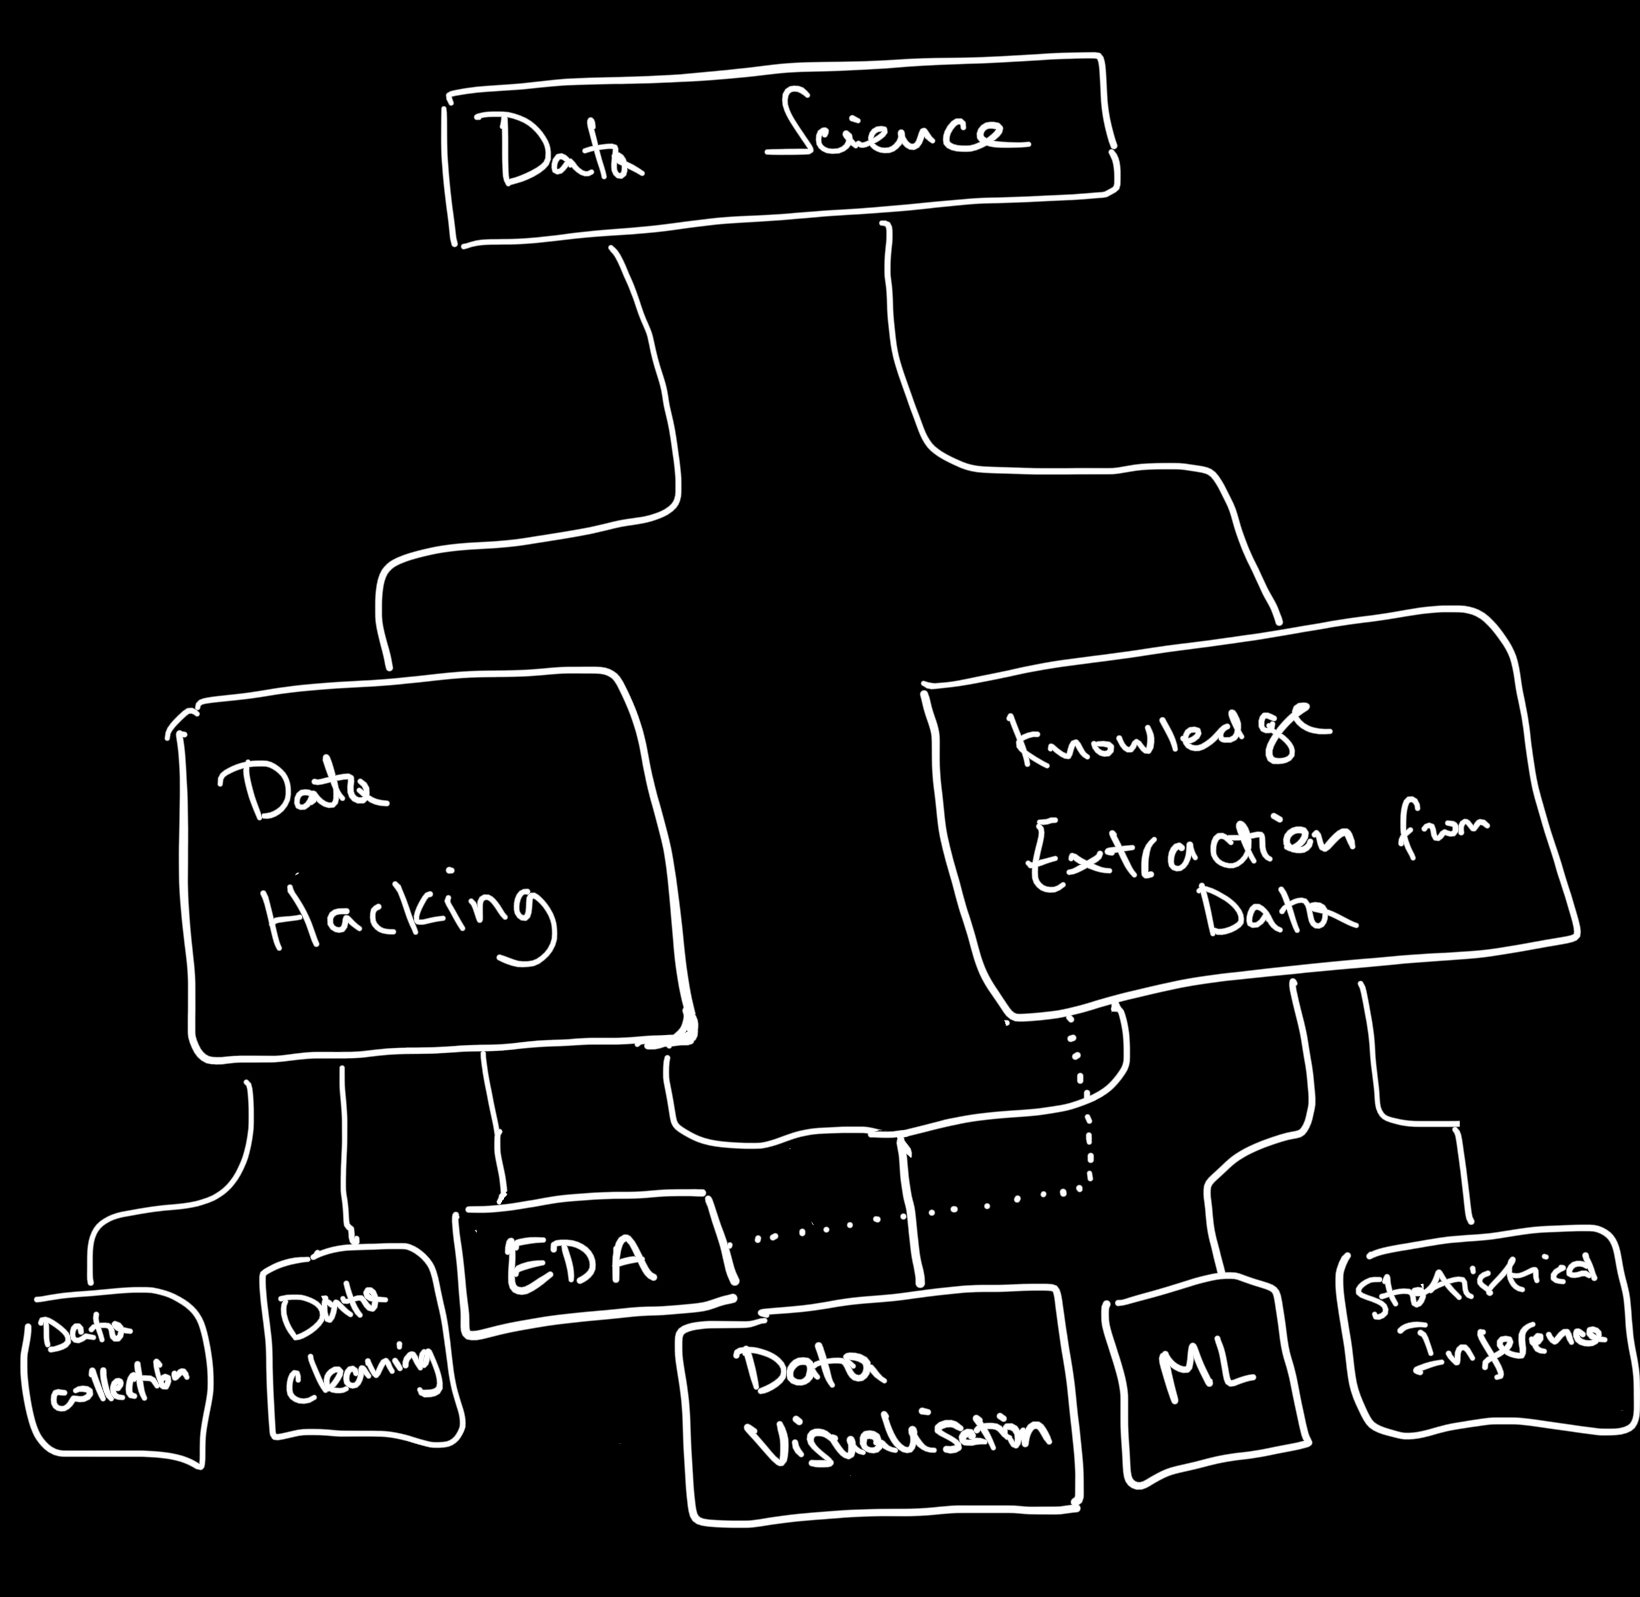

In [8]:
from IPython.display import Image
Image('ds_insights.jpeg', width=600)

## Primer of Pandas:
* Pandas Building Blocks: The Series, DataFrame and Index 
* Loading and reading a data file into a DataFrame
* Wrangling a nasty file
* Writing a DataFrame to file 

In [8]:
# create a pandas series from a list
import pandas as pd
import numpy as np

s = pd.Series([1,3,5,7,9])

# create a pandas series from a dictionary
d = {'a': 1, 'b': 3, 'c': 5, 'd': 7, 'e': 9}
s = pd.Series(d)

#create a pandas series from a numpy array
import numpy as np
a = np.array([1,3,5,7,9])
s = pd.Series(a)

s

0    1
1    3
2    5
3    7
4    9
dtype: int64

In [21]:

# extracting a value from the series

# extract the value at index 0
s[0]
s.iloc[0]
s[0] == s.iloc[0] #integer location

#how about when we have strings as the index? We can use a label based location by calling s.loc[label] instead of s[label]
s = pd.Series([1,3,5,7,9], index=['a','b','c','d','e'])
s.index.name = 'ID'
s.name = 'Cats'

s

s.iloc[1] 

3

In [23]:
s.loc['b'] #label based location
s['b']

3

In [44]:
# let's create a pandas dataframe from a dictionary consisting of cats and dogs columns 
d = {'cats': [1,3,5,7,9], 'dogs': [2,4,6,8,10]}
df = pd.DataFrame(d)

# another way to create a dataframe

cats = pd.Series([1,3,5,7,9], name='cats')
dogs = pd.Series([2,4,6,8,10], name='dogs')
df = pd.concat([cats, dogs], axis=1)

df

birds = pd.Series([1,3,5,7,9], name='birds')
#add birds to df
new_df = pd.concat([df, birds], axis=1)
new_df

# Q: What happens if birds has suddenly become a pandas series with 6 elements instead of 5? How will the new_df look like?


#map the index column to a different column corresponding to some family names
new_df.index = ['Ting', 'Khan', 'Chen', 'Ciuca', 'Williams']
new_df


new_df.index.name = 'Name'
new_df

new_df.loc['Chen']
new_df.iloc[2] # we will soon learn how to select rows based on a condition

# now that we created this dataframe, let's save it somewhere
new_df.to_csv('cats_dogs_birds.csv')



cats     5
dogs     6
birds    5
Name: Chen, dtype: int64

So far, we focused on creating our very own dataframe from scratch. Often times, we already have a dataset that we would like to explore. We now turn our attention to loading this special datafile and reading it properly.